In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

root_path = os.getcwd()
parent_path = os.path.dirname(root_path)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
## Notebook
# root = 'C:/git/explic-ai-tsc'    
## PC
root = 'D:/git/explic-ai-tsc'

MY_DATA_SETS = [
    'BeetleFly', 
    'Earthquakes',
#     'ECG5000',
#     'ElectricDevices',
    'OSULeaf',
]

### Load data

In [2]:
from utils.utils import read_all_datasets
from utils.utils import shape_data
from utils.constants import DATASETS_NAMES
from utils.constants import CLASSIFIERS
from utils.constants import EXPLANATIONS
from utils.constants import ITERATIONS

dataset_dict = read_all_datasets(root, 'UCRArchive_2018')

shaped_data = { }

for dataset in MY_DATA_SETS:
    x_train, y_train, x_test, y_test, y_true, nb_classes, input_shape = shape_data(dataset_dict[dataset])
    shaped_data[dataset] = { 
        'x_train':x_train, 
        'y_train':y_train, 
        'x_test':x_test, 
        'y_test':y_test, 
        'y_true':y_true, 
        'nb_classes':nb_classes, 
        'input_shape':input_shape
}

### Load result data

In [3]:
threshold = '90'

df_occlusion = pd.read_csv(root + '/results/occlusion_results.csv')
df_lime = pd.read_csv(root + '/results/lime_results.csv')
df_rise = pd.read_csv(root + '/results/rise_results.csv')
df_random = pd.read_csv(root + '/results/random_results.csv')

In [4]:
df_occlusion.head()

,classifier,dataset,perturbation,patch_size,threshold,acc_base,acc_zero_tp,change_zero_tp,acc_inverse_tp,change_inverse_tp
0,MLP,BeetleFly,mean,102,90,1.0,0.753086,0.246914,0.617284,0.382716
1,MLP,BeetleFly,zero,102,90,1.0,0.753086,0.246914,0.617284,0.382716
2,MLP,BeetleFly,mean,108,90,1.0,0.791667,0.208333,0.625000,0.375000
3,MLP,BeetleFly,zero,108,90,1.0,0.791667,0.208333,0.625000,0.375000
4,MLP,BeetleFly,mean,114,90,1.0,0.797468,0.202532,0.594937,0.405063


In [5]:
df_lime.head()

,classifier,dataset,perturbation,distance_metric,patch_size,threshold,acc_base,acc_zero_tp,change_zero_tp,acc_inve_tp,change_inve_tp
0,MLP,BeetleFly,mean,dtw,102,90,1.0,0.850000,0.150000,0.600000,0.400000
1,MLP,BeetleFly,mean,euclidean,102,90,1.0,0.809524,0.190476,0.571429,0.428571
2,MLP,BeetleFly,zero,dtw,102,90,1.0,0.800000,0.200000,0.600000,0.400000
3,MLP,BeetleFly,zero,euclidean,102,90,1.0,0.809524,0.190476,0.571429,0.428571
4,MLP,BeetleFly,mean,dtw,108,90,1.0,0.809524,0.190476,0.428571,0.571429


In [6]:
df_rise.head()

,classifier,dataset,interpolation,batch_size,threshold,acc_base,acc_zero_tp,change_zero_tp,acc_inve_tp,change_inve_tp
0,MLP,BeetleFly,fourier,102,90,1.0,0.848485,0.151515,0.707071,0.292929
1,MLP,BeetleFly,linear,102,90,1.0,0.805825,0.194175,0.679612,0.320388
2,MLP,BeetleFly,fourier,108,90,1.0,0.833333,0.166667,0.700000,0.300000
3,MLP,BeetleFly,linear,108,90,1.0,0.833333,0.166667,0.700000,0.300000
4,MLP,BeetleFly,fourier,114,90,1.0,0.822222,0.177778,0.644444,0.355556


In [7]:
df_random.head()

,classifier,dataset,patch_size,threshold,acc_base,acc_zero_tp,change_zero_tp,acc_inve_tp,change_inve_tp
0,MLP,BeetleFly,102,90,1.0,0.877551,0.122449,0.744186,0.255814
1,MLP,BeetleFly,108,90,1.0,0.820513,0.179487,0.725000,0.275000
2,MLP,BeetleFly,114,90,1.0,0.837838,0.162162,0.619048,0.380952
3,MLP,BeetleFly,120,90,1.0,0.857143,0.142857,0.702128,0.297872
4,MLP,BeetleFly,126,90,1.0,0.825000,0.175000,0.638889,0.361111


### Comparison of perturbation operations

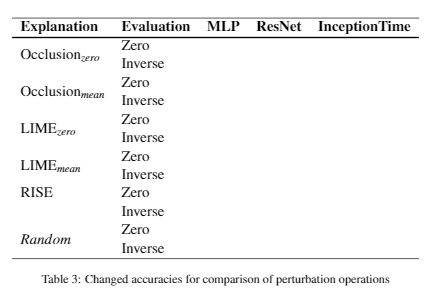

In [8]:
# Generalize over data set per model per explanation calculate the average & generalize over patch size
print('Occlusion')
print()
# Occlusion_zero: MLP + Zero
df_occs_mlp_z = df_occlusion.loc[df_occlusion['perturbation'] == 'zero']
df_occs_mlp_z = df_occs_mlp_z.loc[df_occs_mlp_z['classifier'] == 'MLP']

print('MLP_Z av ch acc:', df_occs_mlp_z['change_zero_tp'].mean())
print('MLP_Z av ch acc:', df_occs_mlp_z['change_inverse_tp'].mean())

# Occlusion_zero: ResNet + Zero
df_occs_rn_z = df_occlusion.loc[df_occlusion['perturbation'] == 'zero']
df_occs_rn_z = df_occs_rn_z.loc[df_occs_rn_z['classifier'] == 'ResNet']

print('RN_Z av ch acc:', df_occs_rn_z['change_zero_tp'].mean())
print('RN_Z av ch acc:', df_occs_rn_z['change_inverse_tp'].mean())

# Occlusion_zero: InceptionTime + Zero
df_occs_it_z = df_occlusion.loc[df_occlusion['perturbation'] == 'zero']
df_occs_it_z = df_occs_it_z.loc[df_occs_it_z['classifier'] == 'InceptionTime']

print('IT_Z av ch acc:', df_occs_it_z['change_zero_tp'].mean())
print('IT_Z av ch acc:', df_occs_it_z['change_inverse_tp'].mean())
print()


# Occlusion_mean: MLP + Mean
df_occs_mlp_m = df_occlusion.loc[df_occlusion['perturbation'] == 'zero']
df_occs_mlp_m = df_occs_mlp_z.loc[df_occs_mlp_z['classifier'] == 'MLP']

print('MLP_M av ch acc:', df_occs_mlp_z['change_zero_tp'].mean())
print('MLP_M av ch acc:', df_occs_mlp_z['change_inverse_tp'].mean())

df_occs_rn_m = df_occlusion.loc[df_occlusion['perturbation'] == 'zero']
df_occs_rn_m = df_occs_rn_z.loc[df_occs_rn_z['classifier'] == 'ResNet']

print('RN_M av ch acc:', df_occs_rn_z['change_zero_tp'].mean())
print('RN_M av ch acc:', df_occs_rn_z['change_inverse_tp'].mean())

# Occlusion_mean: InceptionTime + Mean
df_occs_it_m = df_occlusion.loc[df_occlusion['perturbation'] == 'zero']
df_occs_it_m = df_occs_it_z.loc[df_occs_it_z['classifier'] == 'InceptionTime']

print('IT_M av ch acc:', df_occs_it_z['change_zero_tp'].mean())
print('IT_M av ch acc:', df_occs_it_z['change_inverse_tp'].mean())
print()


Occlusion

MLP_Z av ch acc: 0.48587165512586916
MLP_Z av ch acc: 0.5435818495920682
RN_Z av ch acc: 0.5097529219665453
RN_Z av ch acc: 0.46237851583598555
IT_Z av ch acc: 0.5536379108369065
IT_Z av ch acc: 0.4663713163529617

MLP_M av ch acc: 0.48587165512586916
MLP_M av ch acc: 0.5435818495920682
RN_M av ch acc: 0.5097529219665453
RN_M av ch acc: 0.46237851583598555
IT_M av ch acc: 0.5536379108369065
IT_M av ch acc: 0.4663713163529617



In [9]:
print('LIME')
print()
# LIME_zero: MLP + Perturbation
df_lime_mlp_z = df_lime.loc[df_lime['perturbation'] == 'zero']
df_lime_mlp_z = df_lime_mlp_z.loc[df_lime_mlp_z['distance_metric'] == 'euclidean']
df_lime_mlp_z = df_lime_mlp_z.loc[df_lime_mlp_z['classifier'] == 'MLP']

print('MLP_Z av ch acc:', df_lime_mlp_z['change_zero_tp'].mean())
print('MLP_Z av ch acc:', df_lime_mlp_z['change_inve_tp'].mean())

# LIME_zero: ResNet + Perturbation
df_lime_rn_z = df_lime.loc[df_lime['perturbation'] == 'zero']
df_lime_rn_z = df_lime_rn_z.loc[df_lime_rn_z['distance_metric'] == 'euclidean']
df_lime_rn_z = df_lime_rn_z.loc[df_lime_rn_z['classifier'] == 'ResNet']

print('RN_Z av ch acc:', df_lime_rn_z['change_zero_tp'].mean())
print('RN_Z av ch acc:', df_lime_rn_z['change_inve_tp'].mean())

# LIME_zero: InceptionTime + Perturbation
df_lime_it_z = df_lime.loc[df_lime['perturbation'] == 'zero']
df_lime_it_z = df_lime_it_z.loc[df_lime_it_z['distance_metric'] == 'euclidean']
df_lime_it_z = df_lime_it_z.loc[df_lime_it_z['classifier'] == 'InceptionTime']

print('IT_Z av ch acc:', df_lime_it_z['change_zero_tp'].mean())
print('IT_Z av ch acc:', df_lime_it_z['change_inve_tp'].mean())
print()


# LIME_mean: MLP + Perturbation
df_lime_mlp_m = df_lime.loc[df_lime['perturbation'] == 'mean']
df_lime_mlp_m = df_lime_mlp_m.loc[df_lime_mlp_m['distance_metric'] == 'euclidean']
df_lime_mlp_m = df_lime_mlp_m.loc[df_lime_mlp_m['classifier'] == 'MLP']

print('MLP_M av ch acc:', df_lime_mlp_m['change_zero_tp'].mean())
print('MLP_M av ch acc:', df_lime_mlp_m['change_inve_tp'].mean())

# LIME_mean: ResNet + Perturbation
df_lime_rn_m = df_lime.loc[df_lime['perturbation'] == 'mean']
df_lime_rn_m = df_lime_rn_m.loc[df_lime_rn_m['distance_metric'] == 'euclidean']
df_lime_rn_m = df_lime_rn_m.loc[df_lime_rn_m['classifier'] == 'ResNet']

print('RN_M av ch acc:', df_lime_rn_m['change_zero_tp'].mean())
print('RN_M av ch acc:', df_lime_rn_m['change_inve_tp'].mean())

# LIME_mean: InceptionTime + Perturbation
df_lime_it_m = df_lime.loc[df_lime['perturbation'] == 'mean']
df_lime_it_m = df_lime_it_m.loc[df_lime_it_m['distance_metric'] == 'euclidean']
df_lime_it_m = df_lime_it_m.loc[df_lime_it_m['classifier'] == 'InceptionTime']

print('IT_M av ch acc:', df_lime_it_m['change_zero_tp'].mean())
print('IT_M av ch acc:', df_lime_it_m['change_inve_tp'].mean())
print()

LIME

MLP_Z av ch acc: 0.39278857227970804
MLP_Z av ch acc: 0.4933392612896924
RN_Z av ch acc: 0.3092720701728838
RN_Z av ch acc: 0.2537874151466734
IT_Z av ch acc: 0.37883342105102447
IT_Z av ch acc: 0.3316999903802601

MLP_M av ch acc: 0.3902992630341513
MLP_M av ch acc: 0.4910284445555617
RN_M av ch acc: 0.33703875716955883
RN_M av ch acc: 0.2481550675185876
IT_M av ch acc: 0.365693892695611
IT_M av ch acc: 0.3420445426349009



In [10]:
print('RISE')
print()

# RISE: MLP
df_rise_mlp = df_rise.loc[df_rise['classifier'] == 'MLP']
df_rise_mlp = df_rise_mlp.loc[df_rise_mlp['interpolation'] == 'linear']

print('RISE_MLP av ch acc:', df_rise_mlp['change_zero_tp'].mean())
print('RISE_MLP av ch acc:', df_rise_mlp['change_inve_tp'].mean())

# RISE: ResNet
df_rise_rn = df_rise.loc[df_rise['classifier'] == 'ResNet']
df_rise_rn = df_rise_rn.loc[df_rise_rn['interpolation'] == 'linear']

print('RISE_RN av ch acc:', df_rise_rn['change_zero_tp'].mean())
print('RISE_RN av ch acc:', df_rise_rn['change_inve_tp'].mean())

# RISE: InceptionTime
df_rise_it = df_rise.loc[df_rise['classifier'] == 'InceptionTime']
df_rise_it = df_rise_it.loc[df_rise_it['interpolation'] == 'linear']

print('RISE_IT av ch acc:', df_rise_it['change_zero_tp'].mean())
print('RISE_IT av ch acc:', df_rise_it['change_inve_tp'].mean())


RISE

RISE_MLP av ch acc: 0.24214752591956382
RISE_MLP av ch acc: 0.3259251184391997
RISE_RN av ch acc: 0.1928415587451857
RISE_RN av ch acc: 0.18225593846083737
RISE_IT av ch acc: 0.2995929364985783
RISE_IT av ch acc: 0.337066803719071


In [11]:
print('Random')
print()

# Random: MLP
df_random_mlp = df_random.loc[df_random['classifier'] == 'MLP']

print('RANDOM_MLP av ch acc:', df_random_mlp['change_zero_tp'].mean())
print('RANDOM_MLP av ch acc:', df_random_mlp['change_inve_tp'].mean())

# Random: ResNet
df_random_rn = df_random.loc[df_random['classifier'] == 'ResNet']

print('RANDOM_RN av ch acc:', df_random_mlp['change_zero_tp'].mean())
print('RANDOM_RN av ch acc:', df_random_mlp['change_inve_tp'].mean())

# Random: InceptionTime
df_random_it = df_random.loc[df_random['classifier'] == 'InceptionTime']

print('RANDOM_IT av ch acc:', df_random_mlp['change_zero_tp'].mean())
print('RANDOM_IT av ch acc:', df_random_mlp['change_inve_tp'].mean())


Random

RANDOM_MLP av ch acc: 0.30613388034766786
RANDOM_MLP av ch acc: 0.3701410997774212
RANDOM_RN av ch acc: 0.30613388034766786
RANDOM_RN av ch acc: 0.3701410997774212
RANDOM_IT av ch acc: 0.30613388034766786
RANDOM_IT av ch acc: 0.3701410997774212


### Distance metric dtw compared to euclidean

In [12]:
# Generalize over data set per model per explanation calculate the average & generalize over patch size
print('LIME')
print('MLP')

# LIME_e_z: MLP + Perturbation
df_lime_mlp_z = df_lime.loc[df_lime['perturbation'] == 'zero']
df_lime_mlp_z = df_lime_mlp_z.loc[df_lime_mlp_z['distance_metric'] == 'dtw']
df_lime_mlp_z = df_lime_mlp_z.loc[df_lime_mlp_z['classifier'] == 'MLP']

print('df_lime_mlp_z zero    :', df_lime_mlp_z['change_zero_tp'].mean())
print('df_lime_mlp_z inverse :', df_lime_mlp_z['change_inve_tp'].mean())

print()
# LIME_e_m: MLP + Perturbation
df_lime_mlp_m = df_lime.loc[df_lime['perturbation'] == 'mean']
df_lime_mlp_m = df_lime_mlp_m.loc[df_lime_mlp_m['distance_metric'] == 'dtw']
df_lime_mlp_m = df_lime_mlp_m.loc[df_lime_mlp_m['classifier'] == 'MLP']

print('df_lime_mlp_m zero    :', df_lime_mlp_m['change_zero_tp'].mean())
print('df_lime_mlp_m inverse :', df_lime_mlp_m['change_inve_tp'].mean())


print()
print('ResNet')

# LIME_e_z: ResNet + Perturbation
df_lime_rn_z = df_lime.loc[df_lime['perturbation'] == 'zero']
df_lime_rn_z = df_lime_rn_z.loc[df_lime_rn_z['distance_metric'] == 'dtw']
df_lime_rn_z = df_lime_rn_z.loc[df_lime_rn_z['classifier'] == 'ResNet']

print('df_lime_rn_z zero    :', df_lime_rn_z['change_zero_tp'].mean())
print('df_lime_rn_z inverse :', df_lime_rn_z['change_inve_tp'].mean())

print()
# LIME_e_m: ResNet + Perturbation
df_lime_rn_m = df_lime.loc[df_lime['perturbation'] == 'mean']
df_lime_rn_m = df_lime_rn_m.loc[df_lime_rn_m['distance_metric'] == 'dtw']
df_lime_rn_m = df_lime_rn_m.loc[df_lime_rn_m['classifier'] == 'ResNet']

print('df_lime_rn_m zero    :', df_lime_rn_m['change_zero_tp'].mean())
print('df_lime_rn_m inverse :', df_lime_rn_m['change_inve_tp'].mean())


print()
print('InceptionTime')

# LIME_e_z: InceptionTime + Perturbation
df_lime_it_z = df_lime.loc[df_lime['perturbation'] == 'zero']
df_lime_it_z = df_lime_it_z.loc[df_lime_it_z['distance_metric'] == 'dtw']
df_lime_it_z = df_lime_it_z.loc[df_lime_it_z['classifier'] == 'InceptionTime']

print('df_lime_it_z zero    :', df_lime_it_z['change_zero_tp'].mean())
print('df_lime_it_z inverse :', df_lime_it_z['change_inve_tp'].mean())

print()
# LIME_e_m: InceptionTime + Perturbation
df_lime_it_m = df_lime.loc[df_lime['perturbation'] == 'mean']
df_lime_it_m = df_lime_it_m.loc[df_lime_it_m['distance_metric'] == 'dtw']
df_lime_it_m = df_lime_it_m.loc[df_lime_it_m['classifier'] == 'InceptionTime']

print('df_lime_it_m zero    :', df_lime_it_m['change_zero_tp'].mean())
print('df_lime_it_m inverse :', df_lime_it_m['change_inve_tp'].mean())





LIME
MLP
df_lime_mlp_z zero    : 0.3934188336772565
df_lime_mlp_z inverse : 0.4921987887953409

df_lime_mlp_m zero    : 0.3876904997384177
df_lime_mlp_m inverse : 0.4908897180267765

ResNet
df_lime_rn_z zero    : 0.3186475511098542
df_lime_rn_z inverse : 0.25900537096444437

df_lime_rn_m zero    : 0.3083414315838712
df_lime_rn_m inverse : 0.2562626232520384

InceptionTime
df_lime_it_z zero    : 0.37691606481570206
df_lime_it_z inverse : 0.32430083313578717

df_lime_it_m zero    : 0.3805389987190493
df_lime_it_m inverse : 0.3250972400635173


### Interpolation method

In [13]:
print('RISE')
print()

# RISE: MLP
df_rise_mlp = df_rise.loc[df_rise['classifier'] == 'MLP']
df_rise_mlp = df_rise_mlp.loc[df_rise_mlp['interpolation'] == 'fourier']

print('RISE_MLP av ch acc:', df_rise_mlp['change_zero_tp'].mean())
print('RISE_MLP av ch acc:', df_rise_mlp['change_inve_tp'].mean())

# RISE: ResNet
df_rise_rn = df_rise.loc[df_rise['classifier'] == 'ResNet']
df_rise_rn = df_rise_rn.loc[df_rise_rn['interpolation'] == 'fourier']

print('RISE_RN av ch acc:', df_rise_rn['change_zero_tp'].mean())
print('RISE_RN av ch acc:', df_rise_rn['change_inve_tp'].mean())

# RISE: InceptionTime
df_rise_it = df_rise.loc[df_rise['classifier'] == 'InceptionTime']
df_rise_it = df_rise_it.loc[df_rise_it['interpolation'] == 'fourier']

print('RISE_IT av ch acc:', df_rise_it['change_zero_tp'].mean())
print('RISE_IT av ch acc:', df_rise_it['change_inve_tp'].mean())

RISE

RISE_MLP av ch acc: 0.24889576227761231
RISE_MLP av ch acc: 0.33337940142454475
RISE_RN av ch acc: 0.1822579532635564
RISE_RN av ch acc: 0.16626916824315346
RISE_IT av ch acc: 0.28466902645909753
RISE_IT av ch acc: 0.2964659293921119



### Effect of patch change

In [14]:
# Am beispiel osuleaf
# df_occl_beetlefly = df_occlusion.loc[df_occlusion['dataset'] == 'OSULeaf']
# df_lime_beetlefly = df_lime.loc[df_lime['dataset'] == 'OSULeaf']
# df_rise_beetlefly = df_rise.loc[df_lime['dataset'] == 'OSULeaf']


# dataset_len = 427

# df_occl_beetlefly = df_occlusion.loc[df_occlusion['dataset'] == 'BeetleFly']
# df_lime_beetlefly = df_lime.loc[df_lime['dataset'] == 'BeetleFly']
# df_rise_beetlefly = df_rise.loc[df_lime['dataset'] == 'BeetleFly']

df_occl_beetlefly = df_occlusion.loc[df_occlusion['dataset'] == 'Earthquakes']
df_lime_beetlefly = df_lime.loc[df_lime['dataset'] == 'Earthquakes']
df_rise_beetlefly = df_rise.loc[df_lime['dataset'] == 'Earthquakes']



dataset_len = 512

In [15]:

# Occlusion zero
pc_occ_zero = df_occl_beetlefly.loc[df_occl_beetlefly['perturbation'] == 'zero']

# generalize classifier 
pc_occ_zero = pc_occ_zero.groupby('patch_size').mean().reset_index()

# divide patchsize by len to get fraction
pc_occ_zero.loc[:,'patch_size'] *= 1/dataset_len



# Occlusion mean
pc_occ_mean = df_occl_beetlefly.loc[df_occl_beetlefly['perturbation'] == 'mean']

# generalize classifier 
pc_occ_mean = pc_occ_mean.groupby('patch_size').mean().reset_index()

# divide patchsize by len to get fraction
pc_occ_mean.loc[:,'patch_size'] *= 1/dataset_len


# Lime zero
pc_lime_zero = df_lime_beetlefly.loc[df_lime_beetlefly['perturbation'] == 'zero']

# generalize classifier 
pc_lime_zero = pc_lime_zero.groupby('patch_size').mean().reset_index()

# divide patchsize by len to get fraction
pc_lime_zero.loc[:,'patch_size'] *= 1/dataset_len



# Lime mean
pc_lime_mean = df_lime_beetlefly.loc[df_lime_beetlefly['perturbation'] == 'mean']

# generalize classifier 
pc_lime_mean = pc_lime_mean.groupby('patch_size').mean().reset_index()

# divide patchsize by len to get fraction
pc_lime_mean.loc[:,'patch_size'] *= 1/dataset_len


# Rise
pc_rise = df_rise_beetlefly.loc[df_rise_beetlefly['interpolation'] == 'linear']

# generalize classifier 
pc_rise = pc_rise.groupby('batch_size').mean().reset_index()

# divide patchsize by len to get fraction
pc_rise.loc[:,'batch_size'] *= 1/dataset_len 

pc_rise.rename(columns = {'batch_size':'patch_size'}, inplace = True)


In [16]:
pc_rise.head()

,patch_size,threshold,acc_base,acc_zero_tp,change_zero_tp,acc_inve_tp,change_inve_tp
0,0.009766,90.0,0.9725,0.779167,0.193333,0.640869,0.331631
1,0.011719,90.0,1.0000,0.760870,0.239130,0.789855,0.210145
2,0.019531,90.0,0.9725,0.756032,0.216468,0.621406,0.351094
3,0.023438,90.0,1.0000,0.823944,0.176056,0.816901,0.183099
4,0.029297,90.0,0.9725,0.749749,0.222751,0.588137,0.384363


In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [18]:
pc_occ_zero_zero = pc_occ_zero[['patch_size', 'change_zero_tp']]
pc_occ_mean_zero = pc_occ_mean[['patch_size', 'change_zero_tp']]
pc_lime_zero_zero = pc_lime_zero[['patch_size', 'change_zero_tp']]
pc_lime_mean_zero = pc_lime_zero[['patch_size', 'change_zero_tp']]
pc_rise_zero = pc_rise[['patch_size', 'change_zero_tp']]

In [19]:
pc_occ_zero_inverse = pc_occ_zero[['patch_size', 'change_inverse_tp']]
pc_occ_mean_inverse = pc_occ_mean[['patch_size', 'change_inverse_tp']]
pc_lime_zero_inverse = pc_lime_zero[['patch_size', 'change_inve_tp']]
pc_lime_mean_inverse = pc_lime_zero[['patch_size', 'change_inve_tp']]
pc_rise_inverse = pc_rise[['patch_size', 'change_inve_tp']]

Text(0, 0.5, 'Change of accuracy')

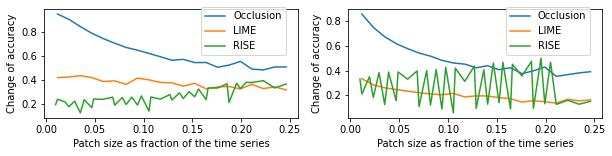

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('')
fig.set_size_inches(10, 2)

# fig = plt.figure()
# ax1 = fig.add_subplot()
# ax2 = fig.add_subplot()

ax1.plot(pc_occ_zero_zero['patch_size'], pc_occ_zero_zero['change_zero_tp'], label='Occlusion')
# ax1.plot(pc_occ_mean_zero['patch_size'], pc_occ_mean_zero['change_zero_tp'], label='Occlusion_mean')
ax1.plot(pc_lime_zero_zero['patch_size'], pc_lime_zero_zero['change_zero_tp'], label='LIME')
# ax1.plot(pc_lime_mean_zero['patch_size'], pc_lime_mean_zero['change_zero_tp'], label='LIME_mean')
ax1.plot(pc_rise_zero['patch_size'], pc_rise_zero['change_zero_tp'], label='RISE')

ax2.plot(pc_occ_zero_inverse['patch_size'], pc_occ_zero_inverse['change_inverse_tp'], label='Occlusion')
# ax2.plot(pc_occ_mean_inverse['patch_size'], pc_occ_mean_inverse['change_inverse_tp'], label='Occlusion_mean')
ax2.plot(pc_lime_zero_inverse['patch_size'], pc_lime_zero_inverse['change_inve_tp'], label='LIME')
# ax2.plot(pc_lime_mean_inverse['patch_size'], pc_lime_mean_inverse['change_inve_tp'], label='LIME_mean')
ax2.plot(pc_rise_inverse['patch_size'], pc_rise_inverse['change_inve_tp'], label='RISE')


ax1.legend(bbox_to_anchor=(0.6,0.53))
ax2.legend(bbox_to_anchor=(0.6,0.53))

ax1.set_xlabel('Patch size as fraction of the time series')
ax1.set_ylabel('Change of accuracy')

ax2.set_xlabel('Patch size as fraction of the time series')
ax2.set_ylabel('Change of accuracy')

